## FLDA1 &FLDA2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
# data loding
dataframe = pd.read_csv('Dsata Set for Assignment 1.csv')

In [3]:
dataframe=dataframe.set_index('id')
dataframe


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [4]:
dataframe['diagnosis'].value_counts()['B']  

357

In [5]:
l1=dataframe.columns.tolist()

l1

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [6]:

dataframe.isnull().sum()

diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             1
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             1
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 2
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# Filling null with mean
for item in l1:
    if item=='diagnosis':
        continue
    dataframe=dataframe.fillna({
        item :dataframe[item].mean()
    })
    
dataframe    

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [8]:
dataframe.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# converting diagnosis to 1 and 0
dataframe['diagnosis'] =[(1 if i is True else 0) for i in (dataframe['diagnosis']=='M')]
dataframe


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [10]:

# for item in l1:
#     if item=='diagnosis':
#         continue
#     for x in dataframe[item]:
#         x=(x-dataframe[item].mean())/dataframe[item].std()
#         print(x)


In [11]:
# normalization
normalized_df=(dataframe-dataframe.mean())/dataframe.std()
normalized_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.296535,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204,1.935312
842517,1.296535,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675,0.280943
84300903,1.296535,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242,0.201214
84348301,1.296535,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726,4.930672
84358402,1.296535,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1.296535,2.118368,0.720838,2.059677,2.341795,1.040926,0.218868,1.945370,2.318924,-0.312314,...,1.899514,0.117596,1.751022,2.012713,0.378033,-0.273077,0.662958,1.627719,-1.358963,-0.708467
926682,1.296535,1.711420,2.083301,1.614577,1.722326,0.102368,-0.017817,0.691347,1.262558,-0.217473,...,1.535369,2.045599,1.420690,1.492668,-0.690623,-0.394473,0.235195,0.733182,-0.531387,-0.973122
926954,1.296535,0.706858,2.043775,0.670803,0.577445,-0.839745,-0.038646,0.045004,0.105684,-0.808406,...,0.560868,1.373645,0.578492,0.426222,-0.808876,0.350427,0.325352,0.413705,-1.103578,-0.318129


In [12]:
normalized_df['diagnosis'] =[(1 if i is True else 0) for i in (normalized_df['diagnosis']>1)]

In [13]:
normalized_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204,1.935312
842517,1,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675,0.280943
84300903,1,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242,0.201214
84348301,1,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726,4.930672
84358402,1,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,2.118368,0.720838,2.059677,2.341795,1.040926,0.218868,1.945370,2.318924,-0.312314,...,1.899514,0.117596,1.751022,2.012713,0.378033,-0.273077,0.662958,1.627719,-1.358963,-0.708467
926682,1,1.711420,2.083301,1.614577,1.722326,0.102368,-0.017817,0.691347,1.262558,-0.217473,...,1.535369,2.045599,1.420690,1.492668,-0.690623,-0.394473,0.235195,0.733182,-0.531387,-0.973122
926954,1,0.706858,2.043775,0.670803,0.577445,-0.839745,-0.038646,0.045004,0.105684,-0.808406,...,0.560868,1.373645,0.578492,0.426222,-0.808876,0.350427,0.325352,0.413705,-1.103578,-0.318129


In [14]:
# confusioin matrix
def confusion_matrix(y_test,y_pred):
    mat = np.zeros((2,2))
    for i in range(len(y_test)):
        if(y_test[i] == 0 and y_pred[i] == 0):
            mat[0][0] += 1
        if(y_test[i] == 0 and y_pred[i] == 1):
            mat[0][1] += 1
        if(y_test[i] == 1 and y_pred[i] == 0):
            mat[1][0] += 1
        if(y_test[i] == 1 and y_pred[i] == 1):
            mat[1][1] += 1
    return mat



In [15]:
#training and matrics
sum=0.0
acc=0
pre=0
rec=0
acclist=np.zeros(10)
prelist=np.zeros(10)
reclist=np.zeros(10)
for i in range(10):
    train_x=normalized_df.sample(frac=0.67,random_state=i+1)
    train_y=train_x['diagnosis']
    train_x.drop('diagnosis',axis=1)

    train=normalized_df.sample(frac=0.67,random_state=i+1)
    test_x=normalized_df.drop(train.index)
    test_y=test_x['diagnosis']
    test_x.drop('diagnosis',axis=1)
    
    clf=LDA()
    clf.fit(train_x,train_y)
    sum =sum+clf.score(test_x,test_y)
    y_test = test_y.to_numpy()
    y_pred = clf.predict(test_x)
    c_mat=confusion_matrix(y_test,y_pred)
    acc = (c_mat[0][0] + c_mat[1][1])*100 /(c_mat[0][0] + c_mat[0][1] + c_mat[1][0] + c_mat[1][1])
    acclist[i]=acc
    pre = (c_mat[0][0]*100) / (c_mat[0][1] + c_mat[0][0])
    prelist[i]=pre
    rec =(c_mat[0][0])*100 / (c_mat[0][0] + c_mat[1][0])
    reclist[i]=rec
    
    
    
score=sum*10


print("\n",score,"\n",acclist.sum()/10,acclist.std(),"\n",prelist.sum()/10,prelist.std()/100,"\n",reclist.sum()/10,reclist.std()/100)


 94.5212765957447 
 94.52127659574468 1.28212455246744 
 99.33210247728348 0.007940745686567849 
 92.41895048093525 0.02198673475236499


In [16]:
# threshold/decision boundary
def discriminant_point(m1,m2,s1,s2):
    x=0.0
  
    a = s2**2 - s1**2
    b = 2*(m2*(s1**2) - m1*(s2**2))
    c = (m1*s2)**2 - (m2*s1)**2
    c -= (s1**2)*(s2**2)*(np.log(((len(X_lda[y==1])**2)*s2)/((len(X_lda[y==0])**2)*s1)))
    x=((-1*b) + np.sqrt(b**2 - (4*a*c)))/(2*a)
    if(x):
        return x
    else:
        return 0


In [17]:
# seperating
X = normalized_df.iloc[:, :-1]
y = normalized_df.iloc[:, 0]
X

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,2.215566,...,0.906286,1.885031,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204
842517,1,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,0.001391,...,-0.099356,1.804340,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675
84300903,1,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,0.938859,...,0.293301,1.510541,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242
84348301,1,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,2.864862,...,2.045711,-0.281217,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726
84358402,1,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,-0.009552,...,0.498889,1.297434,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,2.118368,0.720838,2.059677,2.341795,1.040926,0.218868,1.945370,2.318924,-0.312314,...,0.167832,1.899514,0.117596,1.751022,2.012713,0.378033,-0.273077,0.662958,1.627719,-1.358963
926682,1,1.711420,2.083301,1.614577,1.722326,0.102368,-0.017817,0.691347,1.262558,-0.217473,...,-0.490124,1.535369,2.045599,1.420690,1.492668,-0.690623,-0.394473,0.235195,0.733182,-0.531387
926954,1,0.706858,2.043775,0.670803,0.577445,-0.839745,-0.038646,0.045004,0.105684,-0.808406,...,0.036694,0.560868,1.373645,0.578492,0.426222,-0.808876,0.350427,0.325352,0.413705,-1.103578


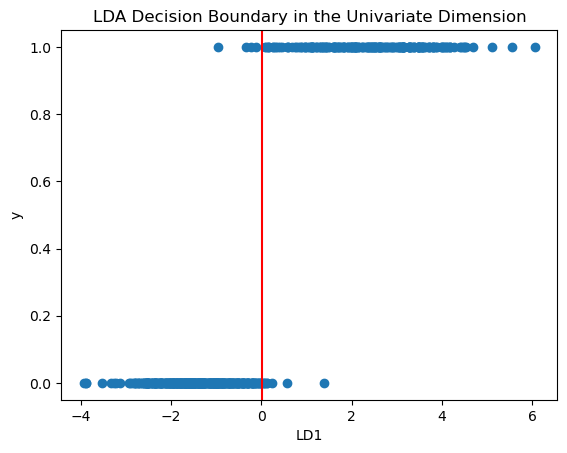

0.010837794285601427


In [18]:
# Visulisation
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
mean_0 = np.mean(X_lda[y==0])
mean_1 = np.mean(X_lda[y==1])
std_0=np.std(X_lda[y==0])
std_1=np.std(X_lda[y==1])

# Create a scatter plot of the data points
plt.scatter(X_lda, y)

x=discriminant_point(mean_0,mean_1,std_0,std_1)
# Plot the decision boundary
plt.axvline(x, color='r')
# Add axis labels and a title
plt.xlabel('LD1')
plt.ylabel('y')
plt.title('LDA Decision Boundary in the Univariate Dimension')

# Show the plot
plt.show()
print(x)

In [19]:
# shuffuling of coulumns
df = normalized_df.sample(frac=1, axis=1).sample(frac=1)
df

,concave points_worst,fractal_dimension_mean,concave points_se,fractal_dimension_se,radius_mean,concavity_mean,radius_se,compactness_mean,perimeter_worst,fractal_dimension_worst,...,concavity_se,concavity_worst,symmetry_mean,compactness_se,compactness_worst,symmetry_worst,concave points_mean,symmetry_se,smoothness_mean,perimeter_mean
id,,,,,,,,,,,,,,,,,,,,,
869691,1.093735,1.545585,1.075131,0.317488,-0.659120,0.966253,-0.308215,1.243242,-0.456252,1.054975,...,0.483544,0.853340,3.160329,0.606741,0.984736,4.644193,0.650232,4.323263,0.905831,-0.537147
862965,-0.613035,-0.853725,-0.810195,-0.855194,-0.550980,-0.817121,-0.767264,-1.211090,-0.674985,-0.839687,...,-0.702434,-0.757481,-0.264893,-1.081653,-1.052808,-0.334191,-0.804558,-0.734578,-1.154020,-0.610093
8811523,-0.012265,0.048495,0.981132,0.370397,-0.633508,-0.283251,-0.392597,0.209400,-0.626774,-0.016379,...,0.913212,0.039058,0.566790,0.918931,0.319919,0.802109,-0.450976,0.893705,-0.194131,-0.605972
91858,-0.206994,0.562633,0.221037,-0.558150,-0.673349,-0.453216,0.119821,-0.136539,-0.557732,-0.353011,...,-0.481140,-0.651500,-0.779224,-0.408574,-0.437693,-0.683325,-0.116464,-0.265207,0.777846,-0.664907
892399,-1.268116,0.391253,0.114073,-0.689288,-1.026226,-0.803062,-0.426854,-0.688678,-1.105905,-0.895608,...,-0.440061,-1.107172,-0.425394,-0.616328,-1.068570,-1.089031,-0.777498,1.705428,0.365449,-1.037471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854253,1.014627,-0.883469,0.024936,-0.427012,0.746699,0.575861,0.203121,0.554014,0.780857,0.132005,...,0.167504,1.287337,0.307801,-0.026574,0.821392,3.171690,0.290207,0.888867,-0.018507,0.744986
884437,-0.718767,0.226956,-0.075545,-0.088775,-1.034763,-0.509829,-0.119980,-0.845080,-0.999365,-0.357994,...,-0.438736,-0.740217,-0.272189,-0.648161,-0.963953,-0.028700,-0.469531,1.719945,0.756515,-1.042829
863031,0.109440,0.340264,0.353932,0.017043,-0.704652,-0.228772,-0.357618,-0.050007,-0.647309,0.388909,...,-0.080955,0.071188,-0.038734,-0.132127,0.074585,-0.153159,-0.362580,-0.591831,1.268455,-0.694580


In [20]:
#training and matrics
sum=0.0
acc=0
pre=0
rec=0
acclist=np.zeros(10)
prelist=np.zeros(10)
reclist=np.zeros(10)
for i in range(10):
    train_x=df.sample(frac=0.67,random_state=i+1)
    train_y=train_x['diagnosis']
    train_x.drop('diagnosis',axis=1)

    train=df.sample(frac=0.67,random_state=i+1)
    test_x=df.drop(train.index)
    test_y=test_x['diagnosis']
    test_x.drop('diagnosis',axis=1)
    
    clf=LDA()
    clf.fit(train_x,train_y)
    sum =sum+clf.score(test_x,test_y)
    y_test = test_y.to_numpy()
    y_pred = clf.predict(test_x)
    c_mat=confusion_matrix(y_test,y_pred)
    acc = (c_mat[0][0] + c_mat[1][1])*100 /(c_mat[0][0] + c_mat[0][1] + c_mat[1][0] + c_mat[1][1])
    acclist[i]=acc
    pre = (c_mat[0][0]*100) / (c_mat[0][1] + c_mat[0][0])
    prelist[i]=pre
    rec =(c_mat[0][0])*100 / (c_mat[0][0] + c_mat[1][0])
    reclist[i]=rec
    
    
    
score=sum*10


print("\n",score,"\n",acclist.sum()/10,acclist.std(),"\n",prelist.sum()/10,prelist.std()/100,"\n",reclist.sum()/10,reclist.std()/100)


 95.53191489361701 
 95.53191489361703 1.6685518235487364 
 99.57786966149509 0.004226734434574253 
 93.57906977836359 0.028474401956617802


In [21]:
# seperating
X = df.iloc[:, :-1]
y = df['diagnosis']
y

id
869691     1
862965     0
8811523    0
91858      0
892399     0
          ..
854253     1
884437     0
863031     0
90250      0
861799     1
Name: diagnosis, Length: 569, dtype: int64

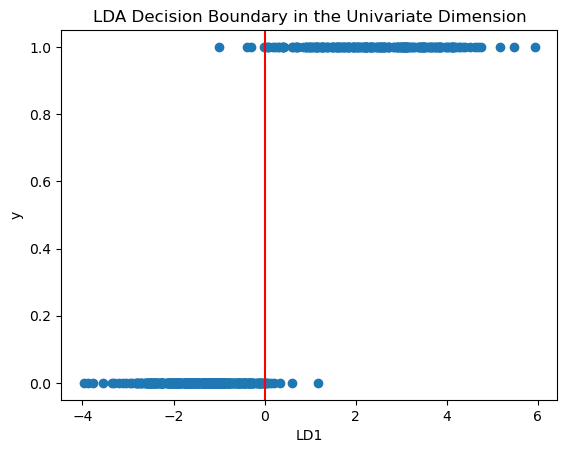

0.00632806009508967


In [22]:
# Visulaisation
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
mean_0 = np.mean(X_lda[y==0])
mean_1 = np.mean(X_lda[y==1])
std_0=np.std(X_lda[y==0])
std_1=np.std(X_lda[y==1])

# Create a scatter plot of the data points
plt.scatter(X_lda, y)
x=discriminant_point(mean_0,mean_1,std_0,std_1)
# Plot the decision boundary
plt.axvline(x, color='r')

# Add axis labels and a title
plt.xlabel('LD1')
plt.ylabel('y')
plt.title('LDA Decision Boundary in the Univariate Dimension')

# Show the plot
plt.show()
print(x)